In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad

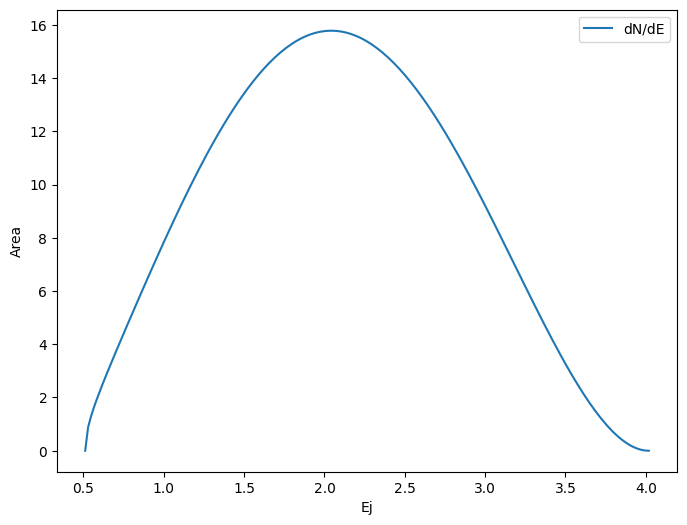

Method #1
Approximate area under the curve: 32.29520622858344


In [7]:

M_e = 0.511  # mass of the electron in MeV 
E_o = 3.508 + M_e  # endpoint energy for He-6 in MeV
channels= 200 # is the number of channels in the spectrum
E_e = np.linspace(M_e, E_o, channels)  # is a range of the emitted electron's energy 
# Defining the dN/dE function
def my_function(E_e): 
    p_e=np.sqrt((E_e*E_e)-(M_e*M_e)) #p_e is the momentum of the energy 
    diff=(E_o-E_e)**2
    count_per_electron = p_e*E_e*diff
    return count_per_electron
dN_dE = my_function(E_e)
plt.figure(figsize=(8, 6))
plt.plot(E_e, dN_dE, label='dN/dE')
plt.xlabel('Ej')
plt.ylabel('Area')
plt.legend()  
plt.show()
#print(my_function(2.0270201))
area_under_curve = np.trapz(dN_dE, E_e)
print('Method #1')
print("Approximate area under the curve:", area_under_curve)


dnorm=(1/area_under_curve)*my_function(E_e)
#print(dnorm)
#area_norm=np.trapz(dnorm,E_e)
#print(area_norm)

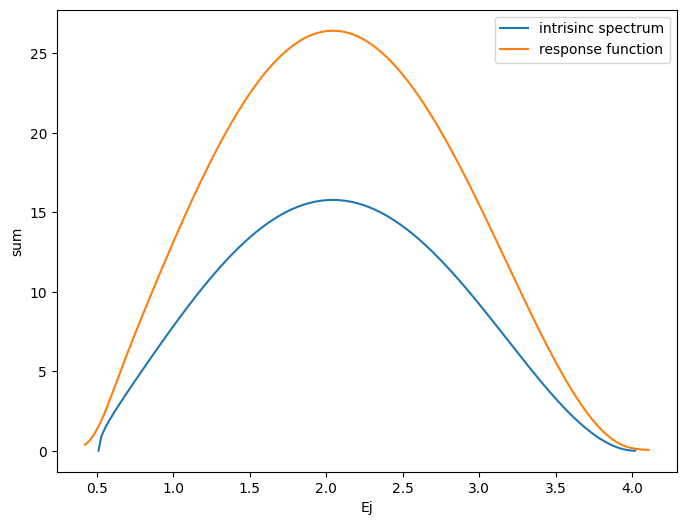

54.293419612466444


In [8]:
###### incorporates the intrisic and response function 
N_i = [] # to store the observed counts 
minor_gaussian = [] #store the energy 
M_e = 0.511  # mass of the electron in MeV 
E_max = 3.508 + M_e  # endpoint energy for He-6 in MeV
channels= 200 # is the number of channels in the spectrum
#energy_per_channel=((E_o-M_e)/channels)
#print((M_e-E_o)/channels)
sigma_energy=5*((E_max-M_e)/channels)
#print(np.linspace(M_e, E_o, channels))

#E_i = np.linspace(M_e, E_max, channels)  # is a range of the emitted electron's energy 
E_j = np.linspace((M_e-sigma_energy), (E_max+sigma_energy), channels)# is a range of the emitted electron's energy 
Ej_max= max(E_j)
Ei_max=max(E_j)
Ej=min(E_j)
Ei=min(E_j)
#print(Ej)
#print(Ei)

#defining step size for integration
dEi=(Ej_max-Ej)/channels
dEj=(Ej_max-Ej)/channels
counts=0
sum_counts=0
while Ej<=Ej_max:
    #print(Ej)
    counts=0
    Ei=min(E_j)
    while Ei <= Ej_max:
        #print(Ej,Ei)
        if Ei<=M_e:
            p_e=0
        else:
            p_e=np.sqrt((Ei*Ei)-(M_e*M_e))# momentum term
    
        diff=(E_max-Ei)**2 
        norm=(1/(np.sqrt(2*np.pi)*sigma_energy*dEi))
        tail=norm*np.exp(-(((Ej-Ei)**2)/(2*(sigma_energy)**2))) # the exponential tail term
        dn_de=((1/area_under_curve))*p_e*Ei*diff
        dcounts =dn_de*tail*dEi
        counts=counts+dcounts
        #print(Ej, Ei, counts)
        Ei=Ei+dEi
    sum_counts=sum_counts+counts
    counts=0
    #print(round(Ej, 4), round(sum_counts, 4))
    N_i.append(sum_counts)
    minor_gaussian.append(Ej)

    sum_counts=0
    Ej=Ej+dEj
    #plt.plot(Ej, sum_counts, label='dN/dE')
#plt.fill_between(gamma, norm, alpha=0.2,label='Area under the curve' )
plt.figure(figsize=(8, 6))
plt.plot(E_e, dN_dE, label='intrisinc spectrum')
plt.plot(minor_gaussian, N_i, label='response function')
plt.xlabel('Ej')
plt.ylabel('sum')
plt.legend()  
plt.show()
area_under_c = np.trapz(N_i, minor_gaussian)
print(area_under_c)



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.38579648241206, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.681464824120603, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1

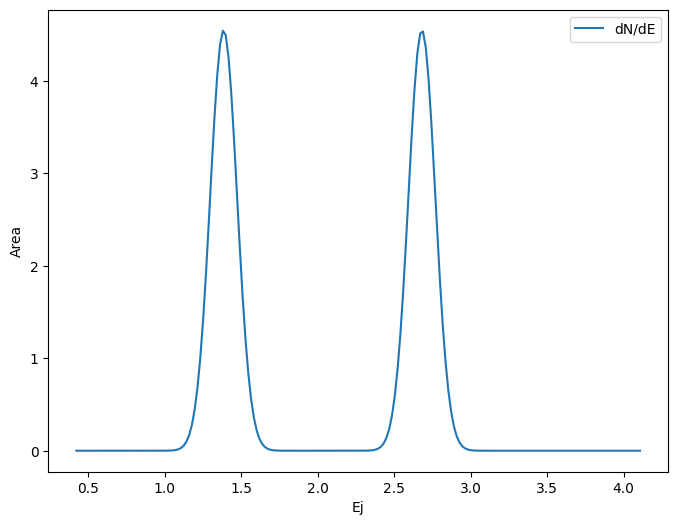

summed area under the curve= 2.0


In [10]:
# incorporates the intrisic and response function 
N_i = [] # to store the observed counts 
minor_gaussian = [] #store the energy 
M_e = 0.511  # mass of the electron in MeV 
E_max = 3.508 + M_e  # endpoint energy for He-6 in MeV
channels= 200 # is the number of channels in the spectrum
#energy_per_channel=((E_o-M_e)/channels)
#print((M_e-E_o)/channels)
sigma_energy=5*((E_max-M_e)/channels)
#print(np.linspace(M_e, E_o, channels))
E_i = np.linspace((M_e-sigma_energy), (E_max+sigma_energy), channels)# is a range of the emitted electron's energy 
E_j = np.linspace((M_e-sigma_energy), (E_max+sigma_energy), channels)# is a range of the emitted electron's energy 
Ej_max= max(E_j)
Ei_max=max(E_i)
Ej=min(E_j)
Ei=min(E_i)
#print(Ej)
#print(Ei)
preserve_index1 = 122
preserve_index2 = 52
#defining step size for integration
dEi=(Ei_max-Ei)/channels
dEj=(Ej_max-Ej)/channels
counts=0
sum_counts=0
E_2 = [0] * len(E_i)

E_2[preserve_index1] = E_i[preserve_index1]
E_2[preserve_index2] = E_i[preserve_index2]
print(E_2)
def dN_dE(Ei):
    if Ei<=M_e:
        p_e=0
    else:
        p_e=np.sqrt((Ei*Ei)-(M_e*M_e))# momentum term
    diff=(E_max-Ei)**2 
    return p_e*diff*Ei

area=[0]*len(E_i)

area[preserve_index1] = 1
area[preserve_index2] = 1
print(area)
while Ej<=Ej_max:
    #print(Ej)
    counts=0
    Ei=min(E_i)
    for Ei,a in zip(E_2, area):
        #print(Ej,Ei)
        norm=(1/(np.sqrt(2*np.pi)*sigma_energy*dEi))
        tail=norm*np.exp(-(((Ej-Ei)**2)/(2*(sigma_energy)**2))) # the exponential tail term
        dcounts = a*tail*dEi
        counts=counts+dcounts
        #print(counts)
        #print(Ej, Ei, counts)
        Ei=Ei+dEi
    sum_counts=sum_counts+counts
    #print(sum_counts)
    counts=0
    #print(round(Ej, 4), round(sum_counts, 4))
    N_i.append(sum_counts)
    minor_gaussian.append(Ej)

    sum_counts=0
    Ej=Ej+dEj
    #plt.plot(Ej, sum_counts, label='dN/dE')
#plt.fill_between(gamma, norm, alpha=0.2,label='Area under the curve' )
#print(N_i)
plt.figure(figsize=(8, 6))
plt.plot(minor_gaussian, N_i, label='dN/dE')
plt.xlabel('Ej')
plt.ylabel('Area')
plt.legend()  
plt.show()
area_under_c = np.trapz(N_i, minor_gaussian)
print("summed area under the curve=", area_under_c)



Test

We have the simulated data points $y_{i}$:

$$y_{i}(E_{e})=p_{e}E_{e}\left(E_{o}-E_{e}\right)^{2}\left(1+b\frac{m}{E_{e}}\right) \quad \text{(1)}$$

where $E_{e}$ is the kinetic energy of the beta particle (electron), $E_{o}$ is the maximum kinetic energy at which the beta particle is emitted, so here  $E_{o}=E_{e}+mc^{2}$, $p_{e}$ is the momentmum of the electron, $m$ used here is the mass of the electron. The last term is one which shows the Fietz constant, $b$, which is what we are investigating. To obtain this constant we will now perform a $\chi^{2}$-minimization. Before we do that lets do some simplifications before we proceed.  

$$p_{e}=\sqrt{E_{e}^{2}-m^{2}} \quad \text{(2)} $$ 

Now let $$ X_{i} =  E_{e}/m $$ so Eqn 2 becomes $$ p_{e} = \sqrt{X_{i}^{2}-1}$$. Also $E_{o}$ becomes $$X_{o}=E_{o}/m$$

Putting Eqn 1 interms of $X_{i}$ and $X_{o}$: $$ y_{i}(X_{i}) = \sqrt{X_{i}^{2}-1}  X_{i}  \left( X_{o}-X_{i}\right)^{2} \left( 1+ \frac{b}{X_{i}}\right) \quad \text{(3)}$$. Let $$ f_{1}(X_{i})= \sqrt{X_{i}^{2}-1} X_{i} \left( X_{o}-X_{i}\right)^{2} \quad \text{(4)} $$ and $$ f_{2}(X_{i}) = \frac{f_{1}(X_{i})}{X_{i}} \quad \text{(5)} $$. 

Expressing $y_{i}$ interms of $f_{1}(X_{i})$ and $f_{2}(X_{i})$ $$y_{i}=f_{1}(X_{i})+b f_{2}(X_{i})$$  and $$y_{fit}=Af_{1}(X_{i})+Bf_{2}(X_{i})$$ where $b=B/A$

Next step is to find our chi squared minimzation 
$$\chi^{2}= \sum_{i=0}^{n} \left(\frac{y_{fit}(X_{i})-y_{i}(X_{i})}{\sigma_{i}}\right)^{2}$$, since are 2 constants A and B that need to be found we take the derivative of the $\chi^{2}$ with respect to these constants such as 


$$ \frac{\partial \chi^{2}}{\partial A} = 2 \sum_{i=0}^{n} \left(\frac{y_{fit}(X_{i})-y_{i}(X_{i})}{\sigma_{i}}\right)\frac{f_{1}(X_{i})}{\sigma_{i}}=0 $$, similarly for B <br>

$$ \frac{\partial \chi^{2}}{\partial B} = 2 \sum_{i=0}^{n} \left(\frac{y_{fit}(X_{i})-y_{i}(X_{i})}{\sigma_{i}}\right)\frac{f_{2}(X_{i})}{\sigma_{i}}=0 $$ <br>.

This will results in a two by two matrix which can be solved using the gaussian jordan method. 




The next task is to put the response function in to the spectrum <br>

$$\frac{dN}{dE}_{obs}(E)=\int^{E_{max}/mc^{2}}_{1}\left(\frac{dN}{dE}\right)_{i}(E'_{i})R(E-E')dE'$$ <br>
where $R(E-E')$ is the reponse function of the detector, given by <br>
$$R(E-E')=\exp{\left(\frac{-(E-E')}{2 \sigma_{E}}\right)^{2}}$$. <br>
Here $\sigma_{E}$ is the spread across the channel over the energy $E$ that is of concern.  